<a href="https://colab.research.google.com/github/sitbayevalibek/data-science-praktikum-amaliyotlar/blob/main/v2_04_VISUAL_AMALIYOT_04_distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 4-MODUL. VIZUALIZASIYA

## 4-AMALIYOT. Distribution


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Ushbu amaliyotda uybor.uz saytidan yuklab olingan ma'lumotlar tahlili bilan shu'gullanamiz.

In [ ]:
df = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/blob/main/uybor_scrapping.csv?raw=true")
df.head()


,location,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70.0,3,5,55000,41.300156,69.210831


#### Yuqoridagi jadvalda Toshkent shahridagi sotildagian uylar haqida ma'lumotlar jamlangan.

## 1-VAZIFA. Jadvaldan xonalari 5 xonadan ko'p bo'lgan, narxi 200000 mingdan, maydoni 250kv.m dan ortiq bo'lgan uylarni tashlab yuboring

In [ ]:
#JAVOBINGIZNI SHUYERGA YOZING
df=df[df['rooms']<6]
df=df[df['size']<250]
df=df[df['price']<200000]
df.shape

(7216, 9)

## 2-VAZIFA. `subplot` yordamida uylarning narxi va xonalar soni taqsimoti grafiklarini yonma yon chizing

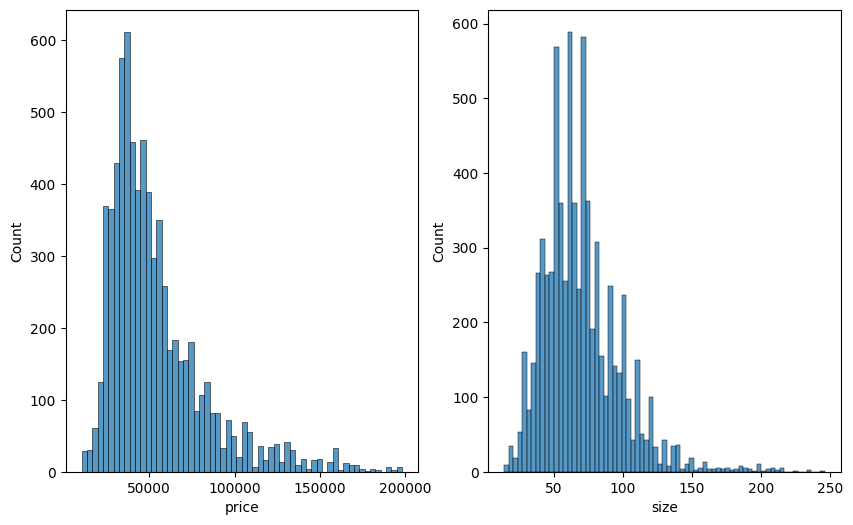

In [ ]:
#JAVOBINGIZNI SHUYERGA YOZING
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df, x='price')
plt.subplot(1,2,2)
sns.histplot(data=df, x='size')
plt.show()

### 2-VAZIFA. Uylarning narxi taqsimoti va narx va maydoni o'rtasidagi bog'liqlik grafiklarini bitta chizmada ustma ust chiqaring.

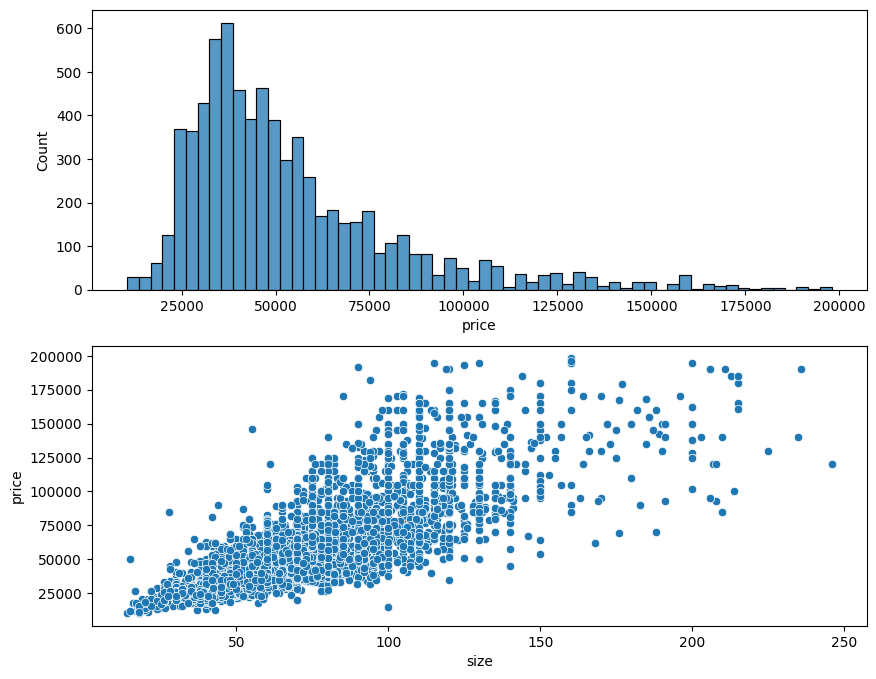

In [ ]:
# JAVOB UCHUN JOY
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(data=df, x='price')
plt.subplot(2,1,2)
sns.scatterplot(data=df,x='size', y='price')
plt.show()

2.1-VAZIFA. Yuoqridagiga qo'shimcha rooms ustunini  ham qo'shib chizing

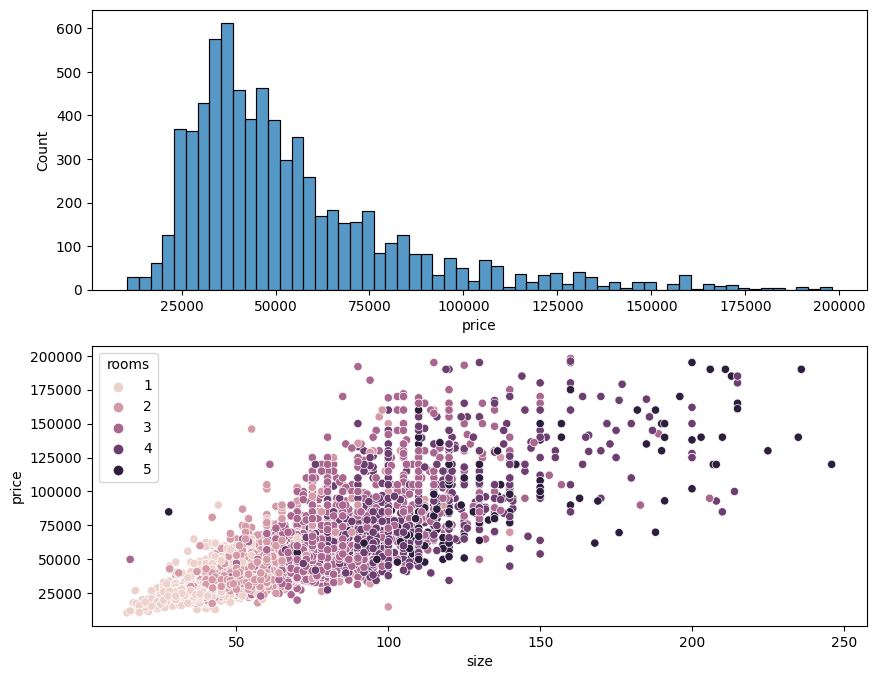

In [ ]:
plt.figure(figsize=(10,8))
plt.subplot(2,1,1)
sns.histplot(data=df, x='price')
plt.subplot(2,1,2)
sns.scatterplot(data=df,x='size', y='price', hue='rooms')
plt.show()

### 3-VAZIFA. Quyidagi grafikni chizing. Ahamiyat bering, oxirgi grafikda tumanlar bo'yicha uylarning o'rtacha narxi tasvirlangan.

<ipython-input-36-2ba9a7dae8a8>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  distdf = df.groupby('district').mean()


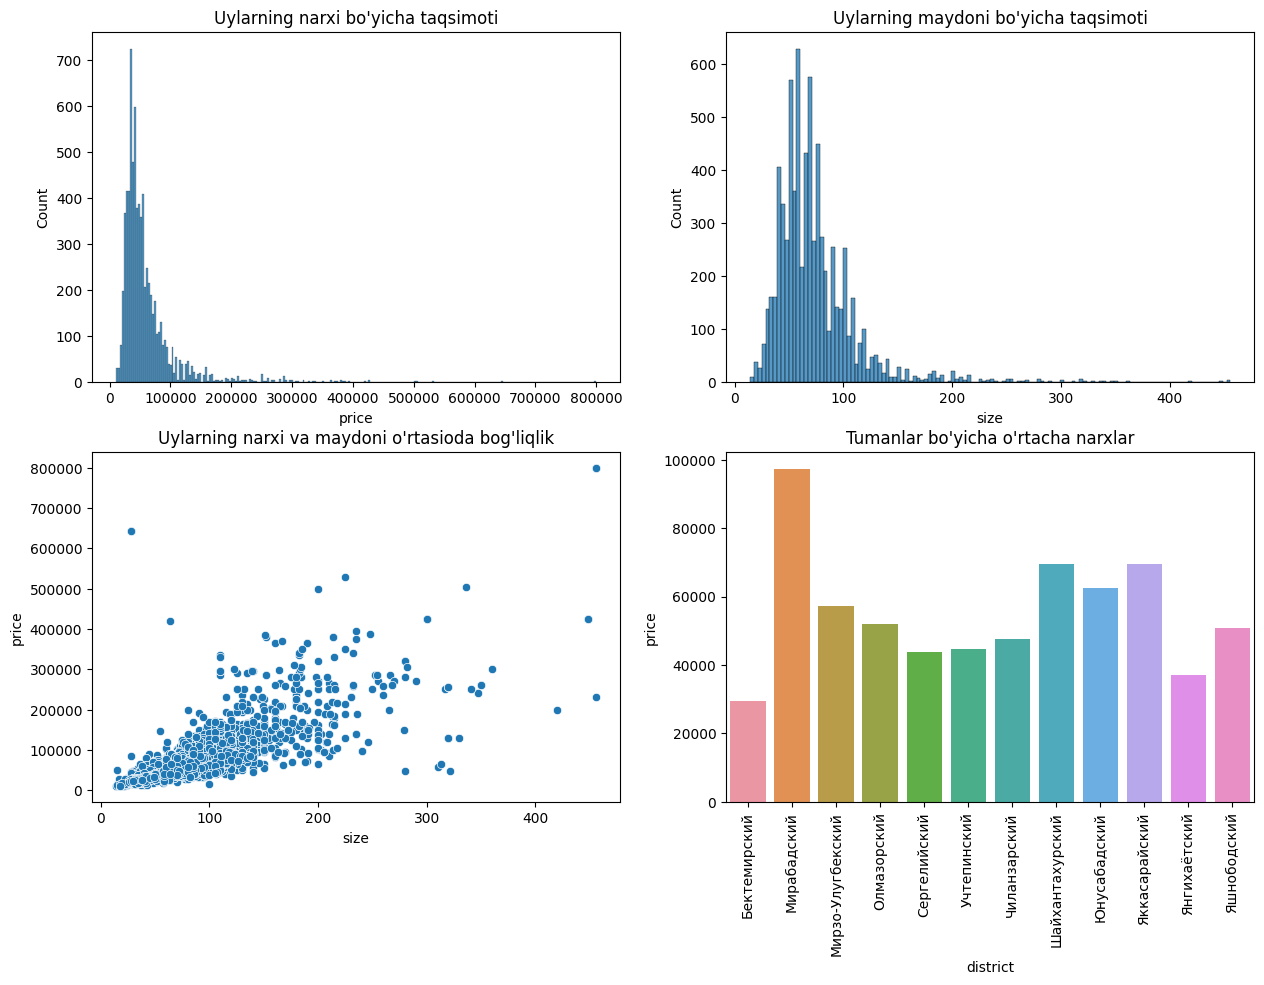

In [ ]:
# JAVOB UCHUN JOY
distdf = df.groupby('district').mean() # <<<<<<<<<<<<<<< ???? yaxshi ishlamayapti
fig, ax = plt.subplots(2,2, figsize=(15,10)) 
sns.histplot(ax=ax[0,0], data=df, x='price')
sns.histplot(ax=ax[0,1], data=df, x='size')
sns.scatterplot(ax=ax[1,0], data=df,x='size', y='price')
sns.barplot(ax=ax[1,1], x=distdf.index, y=distdf['price'] )
plt.xticks(rotation=90)
ax[0,0].set_title("Uylarning narxi bo'yicha taqsimoti")
ax[0,1].set_title("Uylarning maydoni bo'yicha taqsimoti")
ax[1,0].set_title("Uylarning narxi va maydoni o'rtasioda bog'liqlik")
ax[1,1].set_title("Tumanlar bo'yicha o'rtacha narxlar")
plt.show()